## Webscraping Coursera - part 2

This notebook is about webscraping the skills acquired from multiple courses about different data science topics on Coursera. This skills list can be used to design a course curriculum for a data science program or create a course recommender system to recommend courses related to specific skills.

In [447]:
import sys
import datetime
import time
from time import sleep
from selenium import webdriver
import pandas as pd
import json
import requests
from collections import Counter
import matplotlib.pyplot as plt

In [562]:
course_list = {'Courses': ['Introduction to Data Science and Analytics', 'Mathematics and Statistics for Data Science', 'Python programming', 'Big Data and Cloud Computing', 'Introduction to Deep Learning', 'Data Mining and feature engineering', 'Project Management', 'Visualisation and Communication', 'Advanced Machine Learning', 'Advanced Deep Learning', 'Optimisation and Comnbinatorics', 'Research Project', 'AI in Finance', 'Reinforcement Learning'], 'Skill_set': ''}
program = pd.DataFrame(index = ['Introduction to Data Science and Analytics', 'Mathematics and Statistics for Data Science', 'Python programming', 'Big Data and Cloud Computing', 'Introduction to Deep Learning', 'Data Mining and feature engineering', 'Project Management', 'Visualisation and Communication', 'Advanced Machine Learning', 'Advanced Deep Learning', 'Optimisation and Comnbinatorics', 'Research Project', 'AI in Finance', 'Reinforcement Learning'], columns = ['Skill_set'])

In [ ]:
webpage_list = []

Perform web-scraping from Coursera for each individual course

In [717]:
df = pd.DataFrame(columns = ['Course_name','Skills'])
course = []
list1 = []
lists = []
for page in range(10):
    driver = webdriver.Chrome(executable_path=r'chromedriver1.exe')
    #copy and paste the target link from Coursera website for each search term
    pages = 'https://www.coursera.org/search?query=Reinforcement%20Learning&page={}&index=prod_all_products_term_optimization'.format(str(page+1))
    driver.get(pages)
    time.sleep(2)
    driver.maximize_window()
    time.sleep(2)
    login= driver.find_elements_by_class_name('product-photo')
    for x in range(len(login)):
        login[x].click() # Send mouse click
    for x in range(len(login)):
    #         if not x==0:
            driver.switch_to_window(driver.window_handles[1])
            try: 
                course1 = driver.find_element_by_xpath('//*[@id="main"]/div/div[1]/div[1]/div[1]/div[1]/div/div/div[1]/div[2]/h1').text
                course.append(course1)
            except:
                pass
            try:
                course1 = driver.find_element_by_xpath('//*[@id="rendered-content"]/div/div/div[1]/div[4]/div[1]/div/div/div/div/div/div[1]/div/div[1]/div[1]/h1').text
                course.append(course1)
            except:
                pass
            try:
                course1 = driver.find_element_by_xpath('//*[@id="main"]/div/div[1]/div[1]/div[1]/div/div/div[1]/div[2]/h1').text
                course.append(course1)
            except:
                pass
            skills= driver.find_elements_by_class_name('_1q9sh65')
            list1 = [j.text for j in skills]
            lists.append(list1)
            driver.close()
    driver.quit()

<ipython-input-717-07df851510ac>:17: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[1])


In [718]:
d = dict(zip(course,lists))

In [719]:
df = pd.DataFrame([d])

In [720]:
df

,Machine Learning for Trading Specialization,IBM Machine Learning Professional Certificate,Deep Learning and Reinforcement Learning,Advanced Machine Learning Specialization,Deep Learning Specialization,Practical Reinforcement Learning,Machine Learning and Reinforcement Learning in Finance Specialization,Introduction to Reinforcement Learning in Python,Fundamentals of Reinforcement Learning,Reinforcement Learning Specialization,...,How Entrepreneurs in Emerging Markets can master the Blockchain Technology,"Reverse and complement nucleic acid sequences (DNA, RNA) using Python",Serving Tensorflow Models with a REST API,Generative Design for Industrial Applications,Protecting the World: Introducing Corrosion Science and Engineering,Pro Tools Basics,Fundamentals of Music Theory,Introduction to Artificial Intelligence (AI),AI Foundations for Everyone Specialization,機器學習基石上 (Machine Learning Foundations)---Mathematical Foundations
0,"[Finance, Trading, Investment, Machine Learnin...","[Data Science, Deep Learning, Artificial Intel...","[Deep Learning, Artificial Neural Network, Mac...","[Recurrent Neural Network, Tensorflow, Convolu...","[Tensorflow, Convolutional Neural Network, Art...",[],"[Predictive Modelling, Financial Engineering, ...","[Machine Learning, Aritificial Intelligence, R...","[Artificial Intelligence (AI), Machine Learnin...","[Artificial Intelligence (AI), Machine Learnin...",...,"[Computational Biology, R Programming, Rstudio]","[Video-game Development, C sharp (C#) Programm...",[],"[Python Programming, Computational Biology, Sp...","[Tensorflow, Python Programming, Representatio...","[Computer-Aided Design (CAD), Autodesk Fusion ...",[],"[Music, Music production, MIDI, Pro Tools, Mus...","[Music, Chord, Notation, Scales]","[Data Science, Deep Learning, Artificial Intel..."


In [721]:
#creating list of all skills
list=[]
for x in range(len(df.columns)):
    list.append(df.iloc[0][df.columns[x]])
list1 = [j for i in list for j in i]

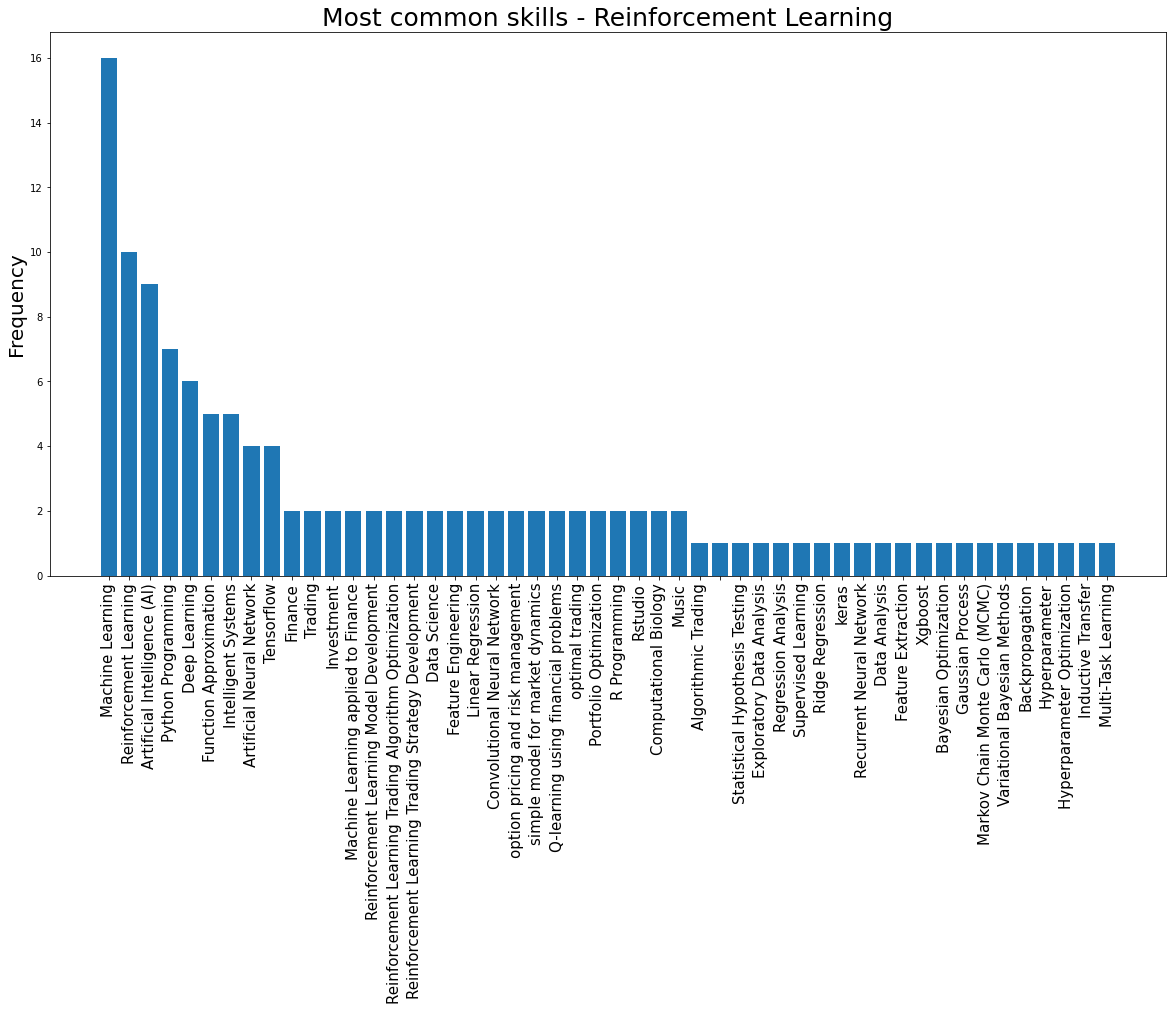

In [722]:
#visualise only top 50 skills a course
c = dict(Counter(list1).most_common(50))
plt.figure(figsize = (20,10))
plt.bar(c.keys(), c.values())
plt.title('Most common skills - Reinforcement Learning', size = 25)
plt.ylabel('Frequency', size=20)
plt.xticks(size = 15,rotation = 90)
plt.show()

In [723]:
#extracting unique elements from skill list
del list
mylist = list(set(list1))

In [724]:
program.loc['Reinforcement Learning']['Skill_set'] = mylist

In [725]:
program

,Skill_set
Introduction to Data Science and Analytics,"[, Xgboost, Data Model, Data Visualization (Da..."
Mathematics and Statistics for Data Science,"[, Trading, Computer Vision, Data Visualizatio..."
Python programming,"[Plotly, Simulation, Data Visualization (DataV..."
Big Data and Cloud Computing,"[, Data Model, Computer Vision, Data Visualiza..."
Introduction to Deep Learning,"[Xgboost, watson, glossary of computer graphic..."
Data Mining and feature engineering,"[Dashboard, Computer Vision, Data Visualizatio..."
Project Management,"[Dashboard, , goal setting, Computer Vision, D..."
Visualisation and Communication,"[Dashboard, Data Model, Computer Vision, Data ..."
Advanced Machine Learning,"[, Xgboost, watson, glossary of computer graph..."
Advanced Deep Learning,"[, Xgboost, watson, glossary of computer graph..."


In [727]:
program.to_csv('program_skills.csv')